In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
from bfunc import bfunc00,bfunc01,bfunc02



In [3]:
reg = 'OrionLH'
line = 'OrionLH'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

10.433847745911214

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
dlog=-0.225

In [8]:
table = sosflog(data,dlog)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
table

s                                                                  \
       count      mean           std       min       25%       50%       75%   
ils                                                                            
1      946.0  3.716349  1.333676e-01  3.556424  3.626319  3.683304  3.795286   
2    60734.0  2.584771  3.376957e-01  2.121999  2.294059  2.525991  2.806473   
3    81684.0  1.677800  2.449637e-01  1.266862  1.455296  1.673950  1.885577   
4    45308.0  1.008652  1.483297e-01  0.753221  0.868178  1.018691  1.130684   
5    17938.0  0.606022  8.075143e-02  0.477057  0.533221  0.607864  0.674648   
6     8604.0  0.353269  6.134122e-02  0.266333  0.266680  0.376740  0.429543   
7     1866.0  0.191995  3.299247e-02  0.168527  0.168609  0.168655  0.238528   
8      648.0  0.119264  1.318179e-15  0.119264  0.119264  0.119264  0.119264   

                   dV2                                                     \
          max    count       mean        std   min    25%    50%      75%   
ils                                                                         
1    4.229287      3.0  24.753333  16.870140  7.29  16.65  26.01  33.4850   
2    3.545478   6021.0  36.483428  44.374855  0.00   4.84  20.25  53.2900   
3    2.113334  24972.0  24.836594  33.179892  0.00   2.56  12.25  33.6400   
4    1.245146  18004.0  17.467978  26.376934  0.00   1.44   7.29  22.0900   
5    0.725455   7705.0  12.281249  18.215222  0.00   1.21   5.29  16.0000   
6    0.430011   3782.0   9.423498  14.133767  0.00   0.81   4.00  12.2500   
7    0.238528    799.0   7.583217  13.145874  0.00   0.64   2.89   8.4100   
8    0.119264    272.0   5.030074   9.721514  0.00   0.36   1.69   5.4075   

             
        max  
ils          
1     40.96  
2    420.25  
3    380.25  
4    316.84  
5    252.81  
6    127.69  
7    156.25  
8     77.44

In [10]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [11]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

0.43764927674839726

In [12]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.13413528066234237

In [13]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

2.3495183056185516

In [14]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [15]:
m = 1.1

In [16]:
rgrid = np.logspace(-2, 1)

(10.433847745911214, 0.43764927674839726, 1.1)

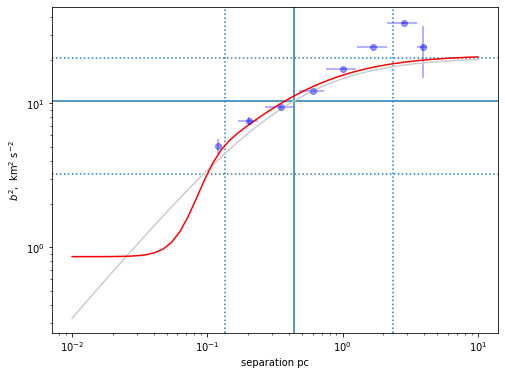

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, VF['s0'], b2.mean()*0.05), color="red")

ax.set(xscale='log', yscale='log', 
       xlabel='separation pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m

In [18]:
table

s                                                                  \
       count      mean           std       min       25%       50%       75%   
ils                                                                            
1      946.0  3.716349  1.333676e-01  3.556424  3.626319  3.683304  3.795286   
2    60734.0  2.584771  3.376957e-01  2.121999  2.294059  2.525991  2.806473   
3    81684.0  1.677800  2.449637e-01  1.266862  1.455296  1.673950  1.885577   
4    45308.0  1.008652  1.483297e-01  0.753221  0.868178  1.018691  1.130684   
5    17938.0  0.606022  8.075143e-02  0.477057  0.533221  0.607864  0.674648   
6     8604.0  0.353269  6.134122e-02  0.266333  0.266680  0.376740  0.429543   
7     1866.0  0.191995  3.299247e-02  0.168527  0.168609  0.168655  0.238528   
8      648.0  0.119264  1.318179e-15  0.119264  0.119264  0.119264  0.119264   

                   dV2                                                     \
          max    count       mean        std   min    25%    50%      75%   
ils                                                                         
1    4.229287      3.0  24.753333  16.870140  7.29  16.65  26.01  33.4850   
2    3.545478   6021.0  36.483428  44.374855  0.00   4.84  20.25  53.2900   
3    2.113334  24972.0  24.836594  33.179892  0.00   2.56  12.25  33.6400   
4    1.245146  18004.0  17.467978  26.376934  0.00   1.44   7.29  22.0900   
5    0.725455   7705.0  12.281249  18.215222  0.00   1.21   5.29  16.0000   
6    0.430011   3782.0   9.423498  14.133767  0.00   0.81   4.00  12.2500   
7    0.238528    799.0   7.583217  13.145874  0.00   0.64   2.89   8.4100   
8    0.119264    272.0   5.030074   9.721514  0.00   0.36   1.69   5.4075   

             
        max  
ils          
1     40.96  
2    420.25  
3    380.25  
4    316.84  
5    252.81  
6    127.69  
7    156.25  
8     77.44

In [19]:
Orion = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m}

In [20]:
f = open('Sfresults\\'+ line + '.pkl',"wb")
pickle.dump(Orion,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [21]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 5.471105575561523 seconds ---
